# Activity 7

For this activity, let's consider the previous classification problem:

## Predicting Customer Churn in a Telecom Company
### Problem Overview
In this classification problem, the goal is to predict whether a customer will churn (leave) or stay with a telecom company based on several features such as customer demographics, service usage, and account information.

- Class label: Churn (1 = Yes, 0 = No)

    - 1: Customer has churned.
    - 0: Customer has stayed.
    
- Features
    - Customer ID: Unique identifier for each customer.
    - Gender: Whether the customer is male or female.
    - Age: Age of the customer.
    - Tenure: Number of months the customer has been with the company.
    - Service Plan: Type of service plan (e.g., Basic, Premium).
    - Monthly Charges: Monthly bill of the customer.
    - Total Charges: Total amount billed to the customer.
    - Internet Service: Whether the customer has internet service (Yes/No).
    - Tech Support: Whether the customer has tech support (Yes/No).
    - Paperless Billing: Whether the customer opts for paperless billing (Yes/No).
    - Payment Method: Payment method (e.g., Bank Transfer, Credit Card).
    - Contract Type: Contract type (e.g., Month-to-month, One year, Two year).
    - Phone Service: Whether the customer has phone service (Yes/No).
    - Multiple Lines: Whether the customer has multiple lines (Yes/No).
    
### Ensemble Models:
- **Random Forest (Bagging)**:
   - **Concept**: Random Forest is an ensemble method that builds multiple decision trees. Each tree is trained on a different random subset of the data (bootstrapping). The final prediction is the majority vote from all trees.
   - **Key Feature**: Bagging (Bootstrap Aggregating) reduces variance by averaging multiple decision trees.
   - **Similarity to Other Models**: Like Bagging, it uses multiple weak learners (decision trees), but it introduces randomness both in data sampling and feature selection, making it more robust.
   
   
- **General Bagging**:
   - **Concept**: Bagging reduces overfitting by creating multiple copies of the model, each trained on a random subset of the data.
   - **Difference from Random Forest**: Random Forest is a specialized form of bagging with added randomness in feature selection. Bagging can use any base estimator, like decision trees in our example.
   
   
- **Gradient Boosting (General Boosting)**:
   - **Concept**: Boosting combines weak learners sequentially. Each model tries to correct the errors made by the previous one by focusing on the misclassified instances.
   - **Key Feature**: The model "boosts" performance by combining models to improve predictions iteratively.
   - **Difference from Bagging**: Unlike bagging, which trains models independently, boosting trains models sequentially.


- **AdaBoost**:
   - **Concept**: AdaBoost adjusts the weights of misclassified instances, thereby focusing on harder-to-predict data points in each subsequent iteration.
   - **Difference from Gradient Boosting**: AdaBoost assigns higher weights to misclassified instances, whereas gradient boosting minimizes the loss function (error) using gradient descent.


- **XGBoost**:
   - **Concept**: XGBoost is an optimized version of gradient boosting, with additional techniques for regularization and performance improvement.
   - **Key Feature**: XGBoost uses tree pruning and parallelization, making it faster and more efficient than traditional gradient boosting.


### Conclusion:
- **Random Forest** and **Bagging** are robust ensemble methods that reduce variance by averaging multiple models.
- **Boosting** methods (**Gradient Boosting**, **AdaBoost**, and **XGBoost**) improve predictions iteratively, making them stronger for datasets with complex patterns.
- Hyperparameter tuning is crucial to optimize the models and improve their performance.

### Dataset
We will use the same dataset we used in Activity 4. This dataset contains information for over 7000 customers.

# Import necessary libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# 1. Load the dataset
# Load the dataset (replace 'telecom_churn_data.csv' with your actual file path)
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows of the dataset
print(data.head())
data.columns

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# 2. EDA (Exploratory Data Analysis)
## Summary statistics

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


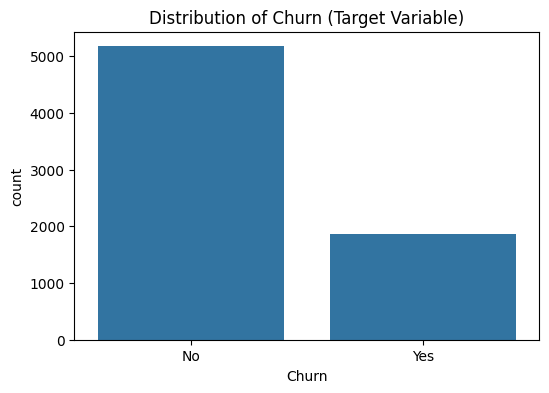

In [13]:
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize the distribution of the target variable (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn (Target Variable)')
plt.show()

## Visualize the distribution of numerical features

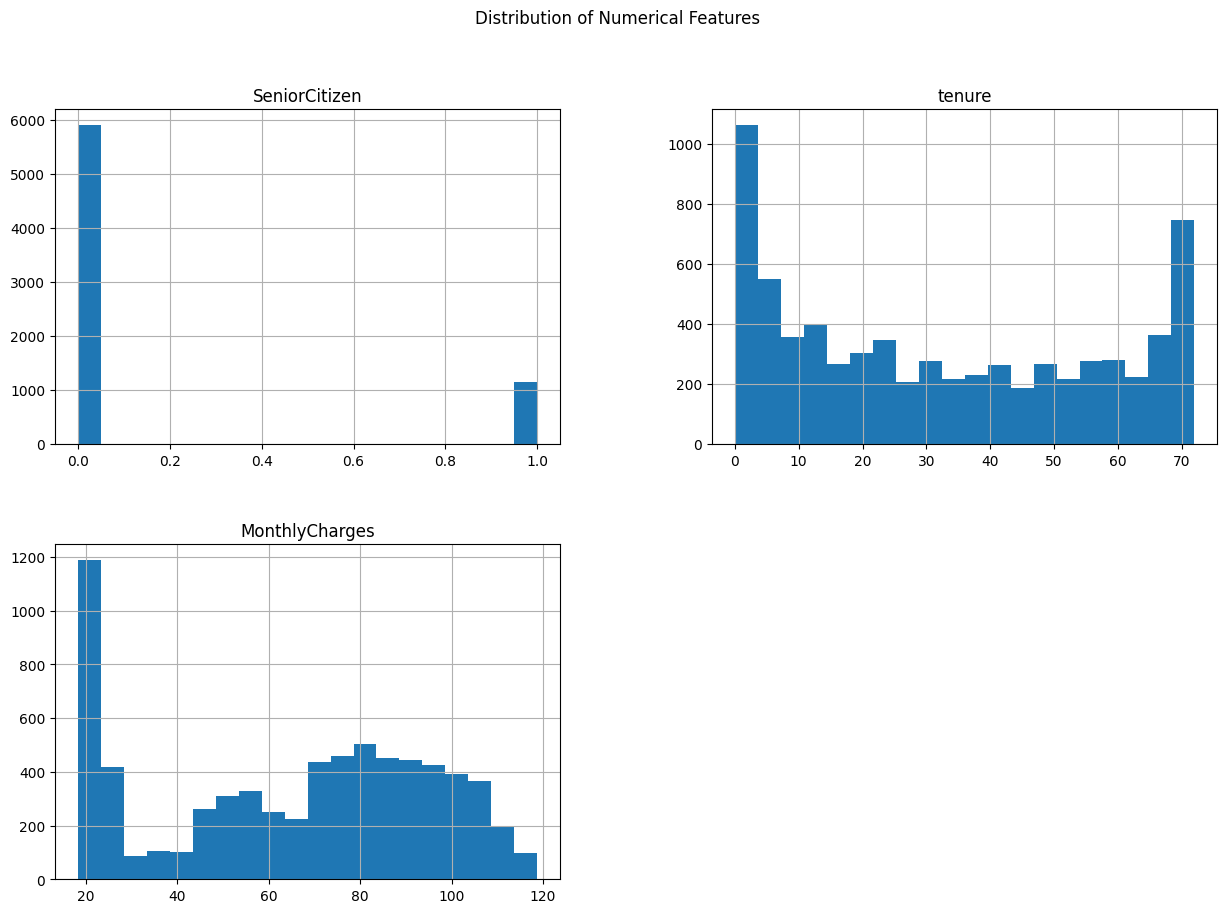

In [14]:
numerical_features = data.select_dtypes(include=[np.number]).columns
data[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

## Correlation heatmap of numerical features

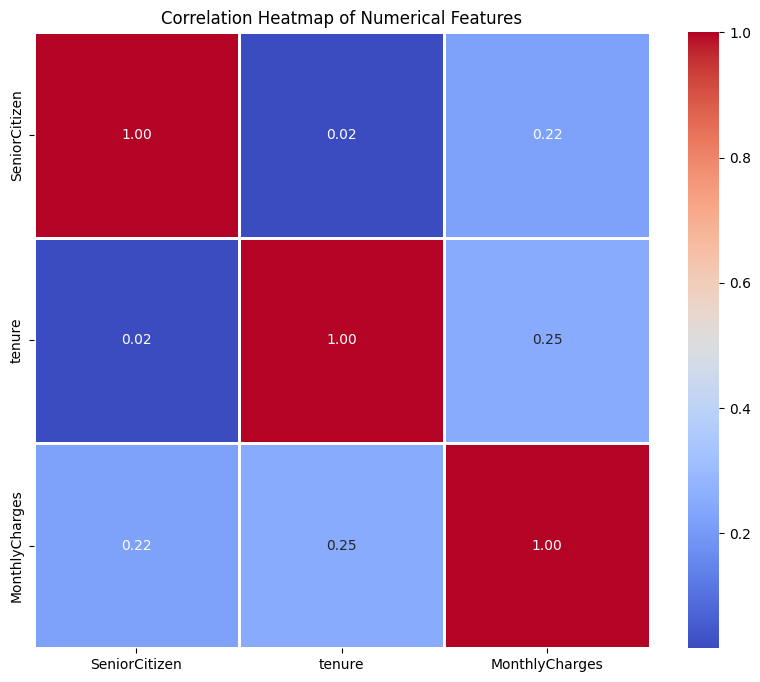

In [15]:
plt.figure(figsize=(10, 8))
corr_matrix = data[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [16]:
print(data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


# 3. Preprocessing
## Handle missing values

In [17]:
# Automatically identify categorical and numerical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# For categorical columns, we'll use mode imputation
imputer_categorical = SimpleImputer(strategy='most_frequent')

# Apply the imputer to each categorical column individually
for col in categorical_columns:
    data[col] = imputer_categorical.fit_transform(data[[col]]).reshape(-1)

# For numerical columns, we use mean imputation
imputer_numerical = SimpleImputer(strategy='mean')

# Apply the imputer to each numerical column individually
for col in numerical_columns:
    data[col] = imputer_numerical.fit_transform(data[[col]])
    

## Data Preparation

In [18]:
# Separate the target variable (Churn) from the features before applying pd.get_dummies
y = data['Churn']
X = data.drop(columns=['Churn'])

# Convert categorical labels 'Yes'/'No' into numerical labels 1/0
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Remove 'Churn' from the categorical_columns list, as it is the target variable
categorical_preds = [col for col in categorical_columns if col != 'Churn']

# Apply One-Hot Encoding only to categorical columns (excluding Churn)
X = pd.get_dummies(X, columns=categorical_preds, drop_first=True)

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data for models that require scaling (e.g., XGBoost)
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# 4. Model Training and Evaluation

In [19]:
# function to evaluate the model performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_tr = model.predict(X_train)
    y_pred_tt = model.predict(X_test)

    # COmpute scores
    acc_train = accuracy_score(y_train, y_pred_tr)
    prec_train = precision_score(y_train, y_pred_tr)
    rec_train = recall_score(y_train, y_pred_tr)
    f1_train = f1_score(y_train, y_pred_tr)

    acc_test = accuracy_score(y_test, y_pred_tt)
    prec_test = precision_score(y_test, y_pred_tt)
    rec_test = recall_score(y_test, y_pred_tt)
    f1_test = f1_score(y_test, y_pred_tt)

    print("Perfomance on training data")
    print(f"Accuracy: {acc_train}")
    print(f"Prediction: {prec_train}")
    print(f"Recall: {rec_train}")
    print(f"F1-score: {f1_train}")
    
    print("Perfomance on testing data")
    print(f"Accuracy: {acc_test}")
    print(f"Prediction: {prec_test}")
    print(f"Recall: {rec_test}")
    print(f"F1-score: {f1_test}")

## 4.1 Random Forest (Bagging)
Random Forest is an ensemble model based on bagging where multiple decision trees are trained independently on random subsets of the training data and their predictions are averaged. Random Forest works well
for both classification and regression tasks.

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
print("Random Forest Results:")
evaluate_model(rf_model, X_train, X_test, y_train, y_test)

Random Forest Results
Perfomance on training data
Accuracy: 1.0
Prediction: 1.0
Recall: 1.0
F1-score: 1.0
Perfomance on testing data
Accuracy: 0.8034066713981547
Prediction: 0.6983471074380165
Recall: 0.45308310991957107
F1-score: 0.5495934959349593


## 4.2 General Bagging (BaggingClassifier with DecisionTreeClassifier)
General bagging is the process of generating multiple bootstrapped datasets (random subsets of data) and training separate models on them. In the case of BaggingClassifier, we use DecisionTreeClassifier as the base estimator. Bagging reduces variance by combining multiple models.

In [ ]:
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
print("General Bagging Results:")
evaluate_model(bagging_model,X_train, X_test, y_train, y_test)

General Bagging Results
Perfomance on training data
Accuracy: 0.9994675186368477
Prediction: 0.9993311036789297
Recall: 0.9986631016042781
F1-score: 0.9989969909729187
Perfomance on testing data
Accuracy: 0.8019872249822569
Prediction: 0.6753731343283582
Recall: 0.48525469168900803
F1-score: 0.5647425897035881


# 4.3 Gradient Boosting (General Boosting)
Gradient Boosting is a boosting algorithm that sequentially builds models (trees) where each new model corrects the errors of the previous ones. It works by reducing the residual errors in the dataset.

In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)
print("Gradient Boosting Results:")
evaluate_model(gb_model, X_train, X_test, y_train, y_test)

Gradient Boosting Results
Perfomance on training data
Accuracy: 0.8099041533546326
Prediction: 0.6962142197599261
Recall: 0.5040106951871658
F1-score: 0.5847227607599845
Perfomance on testing data
Accuracy: 0.8133427963094393
Prediction: 0.6950354609929078
Recall: 0.5254691689008043
F1-score: 0.5984732824427481


# 4.4 AdaBoost
AdaBoost (Adaptive Boosting) is another boosting technique, but it focuses on correcting mistakes made by previous models by adjusting the weights of misclassified instances. This leads to more emphasis on hard-to-classify samples.

In [25]:
adaboost_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
print("AdaBoost Results:")
evaluate_model(adaboost_model, X_train, X_test, y_train, y_test)

AdaBoost Results


c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Perfomance on training data
Accuracy: 0.8127440539581114
Prediction: 0.6782538399353274
Recall: 0.5608288770053476
F1-score: 0.6139773143066227
Perfomance on testing data
Accuracy: 0.8161816891412349
Prediction: 0.6815286624203821
Recall: 0.5737265415549598
F1-score: 0.6229985443959243


## 4.5 XGBoost
XGBoost (Extreme Gradient Boosting) is an optimized implementation of gradient boosting. It is known for its speed and efficiency, especially with large datasets. It performs better in terms of both accuracy and computational efficiency when compared to standard gradient boosting.

In [26]:
xgb_model = XGBClassifier(random_state=42)
print("XGBoost Results:")
evaluate_model(xgb_model, X_train, X_test, y_train, y_test)

XGBoost Results:
Perfomance on training data
Accuracy: 0.9298899538516152
Prediction: 0.8986241853729182
Recall: 0.8295454545454546
F1-score: 0.8627042057698991
Perfomance on testing data
Accuracy: 0.78708303761533
Prediction: 0.6166134185303515
Recall: 0.517426273458445
F1-score: 0.5626822157434402


# 5. Hyperparameter Tuning for all Models

# 6. Conclusion